**EXPLORATORY DATA ANALYSIS AND MANIPULATION FOR HOUSE PRICES**

In [1]:
# load required packages
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('bmh')

In [2]:
# load data
df = pd.read_csv("train.csv")
#df.info()
#df.head()

In [3]:
# plot distribution of target variable (house sale price)
y = df['SalePrice']
#print(y.describe())

#sns.distplot(y, color='g', bins=100, hist_kws={'alpha': 0.4})

# logscale distribution is better
#plt.figure(figsize=(10,10))
#plt.hist(y, bins=np.geomspace(y.min(), y.max(), 50))
#plt.xscale('log')
#plt.show()

In [4]:
# deal with missing and outlier/error values
df2 = df.copy()
del df2['Id']
#df2 = df2[[column for column in df2 if df2[column].count() / len(df2) >= 0.5]]
#dropped = []
#for col in df.columns:
#    if col not in df2.columns:
#        dropped.append(col)
#print(*dropped, sep=', ')

# all below from https://www.kaggle.com/juliensiems/cleaning-new-features-gps-coordinates-included

# replace missing values with zeros
ls = ['BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'GarageArea', 'GarageCars',
     'KitchenAbvGr', 'LotFrontage', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'PoolArea',
      'ScreenPorch', 'TotRmsAbvGrd', 'WoodDeckSF']
for f in ls:
    df2[f].fillna(0, inplace=True)
    
# relace missing values with labels
ls_no = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Fence',
        'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MiscFeature','PoolQC']
for f in ls_no:
    df2[f].fillna("No", inplace=True)
    
# replace missing values with other labels
ls_ta = ['ExterCond', 'ExterQual', 'HeatingQC', 'KitchenQual']
ls_norm = ['Condition1', 'Condition2']
for f in ls_ta:
    df2[f].fillna("TA", inplace=True)
for f in ls_norm:
    df2[f].fillna("Norm", inplace=True)

df2['Alley'].fillna('None', inplace=True)
df2['CentralAir'].fillna('N', inplace=True)
df2['PavedDrive'].fillna('N', inplace=True)
df2['Functional'].fillna('Typ', inplace=True)
df2['LotShape'].fillna('Reg', inplace=True)
df2['MasVnrType'].fillna('None', inplace=True)
df2['SaleCondition'].fillna('Normal', inplace=True)
df2['Utilities'].fillna('AllPub', inplace=True)

# add features to replace neighborhood by its coordinates
df2['lat'] = df2['Neighborhood'].replace({'Blmngtn' : 42.062806,
                                               'Blueste' : 42.009408,
                                                'BrDale' : 42.052500,
                                                'BrkSide': 42.033590,
                                                'ClearCr': 42.025425,
                                                'CollgCr': 42.021051,
                                                'Crawfor': 42.025949,
                                                'Edwards': 42.022800,
                                                'Gilbert': 42.027885,
                                                'GrnHill': 42.000854,
                                                'IDOTRR' : 42.019208,
                                                'Landmrk': 42.044777,
                                                'MeadowV': 41.991866,
                                                'Mitchel': 42.031307,
                                                'NAmes'  : 42.042966,
                                                'NoRidge': 42.050307,
                                                'NPkVill': 42.050207,
                                                'NridgHt': 42.060356,
                                                'NWAmes' : 42.051321,
                                                'OldTown': 42.028863,
                                                'SWISU'  : 42.017578,
                                                'Sawyer' : 42.033611,
                                                'SawyerW': 42.035540,
                                                'Somerst': 42.052191,
                                                'StoneBr': 42.060752,
                                                'Timber' : 41.998132,
                                                'Veenker': 42.040106})

df2['lon'] = df2['Neighborhood'].replace({'Blmngtn' : -93.639963,
                                               'Blueste' : -93.645543,
                                                'BrDale' : -93.628821,
                                                'BrkSide': -93.627552,
                                                'ClearCr': -93.675741,
                                                'CollgCr': -93.685643,
                                                'Crawfor': -93.620215,
                                                'Edwards': -93.663040,
                                                'Gilbert': -93.615692,
                                                'GrnHill': -93.643377,
                                                'IDOTRR' : -93.623401,
                                                'Landmrk': -93.646239,
                                                'MeadowV': -93.602441,
                                                'Mitchel': -93.626967,
                                                'NAmes'  : -93.613556,
                                                'NoRidge': -93.656045,
                                                'NPkVill': -93.625827,
                                                'NridgHt': -93.657107,
                                                'NWAmes' : -93.633798,
                                                'OldTown': -93.615497,
                                                'SWISU'  : -93.651283,
                                                'Sawyer' : -93.669348,
                                                'SawyerW': -93.685131,
                                                'Somerst': -93.643479,
                                                'StoneBr': -93.628955,
                                                'Timber' : -93.648335,
                                                'Veenker': -93.657032})

# create new features by combining existing features
df2['IsRegularLotShape'] = (df2['LotShape'] =='Reg') * 1
df2['IsLandLevel'] = (df2['LandContour'] == 'Lvl') * 1
df2['IsLandSlopeGentle'] = (df2['LandSlope'] == 'Gtl') * 1
df2['IsElectricalSBrkr'] = (df2['Electrical'] == 'SBrkr') * 1
df2['IsGarageDetached'] = (df2['GarageType'] == 'Detchd') * 1
df2['IsPavedDrive'] = (df2['PavedDrive'] == 'Y') * 1
df2['HasShed'] = (df2['MiscFeature'] == 'Shed') * 1.
df2['Remodeled'] = (df2['YearRemodAdd'] != df2['YearBuilt']) * 1
df2['RecentRemodel'] = (df2['YearRemodAdd'] == df2['YrSold']) * 1
df2['VeryNewHouse'] = (df2['YearBuilt'] == df2['YrSold']) * 1
df2['HasMasVnr'] = (df2['MasVnrArea'] == 0) * 1
df2['HasWoodDeck'] = (df2['WoodDeckSF'] == 0) * 1
df2['HasOpenPorch'] = (df2['OpenPorchSF'] == 0) * 1
df2['HasEnclosedPorch'] = (df2['EnclosedPorch'] == 0) * 1
df2['Has3SsnPorch'] = (df2['3SsnPorch'] == 0) * 1
df2['HasScreenPorch'] = (df2['ScreenPorch'] == 0) * 1

# encode categorical variables
df2 = df2.replace({'Alley' : {'Grvl' : 1, 'Pave' : 2},
                           'BsmtCond' : {'No' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
                           'BsmtExposure' : {'No' : 0, 'Mn' : 1, 'Av': 2, 'Gd' : 3},
                           'BsmtFinType1' : {'No' : 0, 'Unf' : 1, 'LwQ': 2, 'Rec' : 3, 'BLQ' : 4,
                                             'ALQ' : 5, 'GLQ' : 6},
                           'BsmtFinType2' : {'No' : 0, 'Unf' : 1, 'LwQ': 2, 'Rec' : 3, 'BLQ' : 4,
                                             'ALQ' : 5, 'GLQ' : 6},
                           'BsmtQual' : {'No' : 0, 'Po' : 1, 'Fa' : 2, 'TA': 3, 'Gd' : 4, 'Ex' : 5},
                           'ExterCond' : {'Po' : 1, 'Fa' : 2, 'TA': 3, 'Gd': 4, 'Ex' : 5},
                           'ExterQual' : {'Po' : 1, 'Fa' : 2, 'TA': 3, 'Gd': 4, 'Ex' : 5},
                           'FireplaceQu' : {'No' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
                           'Functional' : {'Sal' : 1, 'Sev' : 2, 'Maj2' : 3, 'Maj1' : 4, 'Mod': 5,
                                           'Min2' : 6, 'Min1' : 7, 'Typ' : 8},
                           'GarageCond' : {'No' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
                           'GarageQual' : {'No' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
                           'HeatingQC' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
                           'KitchenQual' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
                           'LandSlope' : {'Sev' : 1, 'Mod' : 2, 'Gtl' : 3},
                           'LotShape' : {'IR3' : 1, 'IR2' : 2, 'IR1' : 3, 'Reg' : 4},
                           'PavedDrive' : {'N' : 0, 'P' : 1, 'Y' : 2},
                           'PoolQC' : {'No' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4},
                           'Street' : {'Grvl' : 1, 'Pave' : 2},
                           'Utilities' : {'ELO' : 1, 'NoSeWa' : 2, 'NoSewr' : 3, 'AllPub' : 4}})

# simplify existing features
df2['SimplOverallQual'] = df2.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                           4 : 2, 5 : 2, 6 : 2, # average
                                                           7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                          })
df2['SimplOverallCond'] = df2.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                           4 : 2, 5 : 2, 6 : 2, # average
                                                           7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                          })
df2['SimplPoolQC'] = df2.PoolQC.replace({1 : 1, 2 : 1, # average
                                                 3 : 2, 4 : 2 # good
                                                })
df2['SimplGarageCond'] = df2.GarageCond.replace({1 : 1, # bad
                                                         2 : 1, 3 : 1, # average
                                                         4 : 2, 5 : 2 # good
                                                        })
df2['SimplGarageQual'] = df2.GarageQual.replace({1 : 1, # bad
                                                         2 : 1, 3 : 1, # average
                                                         4 : 2, 5 : 2 # good
                                                        })
df2['SimplFireplaceQu'] = df2.FireplaceQu.replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          })
df2['SimplFireplaceQu'] = df2.FireplaceQu.replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          })
df2['SimplFunctional'] = df2.Functional.replace({1 : 1, 2 : 1, # bad
                                                         3 : 2, 4 : 2, # major
                                                         5 : 3, 6 : 3, 7 : 3, # minor
                                                         8 : 4 # typical
                                                        })
df2['SimplKitchenQual'] = df2.KitchenQual.replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          })
df2['SimplHeatingQC'] = df2.HeatingQC.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df2['BadHeating'] = df2.HeatingQC.replace({1 : 1, # bad
                                                       2 : 0, 3 : 0, # average
                                                       4 : 0, 5 : 0 # good
                                                      })
df2['SimplBsmtFinType1'] = df2.BsmtFinType1.replace({1 : 1, # unfinished
                                                             2 : 1, 3 : 1, # rec room
                                                             4 : 2, 5 : 2, 6 : 2 # living quarters
                                                            })
df2['SimplBsmtFinType2'] = df2.BsmtFinType2.replace({1 : 1, # unfinished
                                                             2 : 1, 3 : 1, # rec room
                                                             4 : 2, 5 : 2, 6 : 2 # living quarters
                                                            })
df2['SimplBsmtCond'] = df2.BsmtCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
df2['SimplBsmtQual'] = df2.BsmtQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
df2['SimplExterCond'] = df2.ExterCond.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df2['SimplExterQual'] = df2.ExterQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })

# combining existing features
df2['OverallGrade'] = df2['OverallQual'] * df2['OverallCond']
df2['GarageGrade'] = df2['GarageQual'] * df2['GarageCond']
df2['ExterGrade'] = df2['ExterQual'] * df2['ExterCond']
df2['KitchenScore'] = df2['KitchenAbvGr'] * df2['KitchenQual']
df2['FireplaceScore'] = df2['Fireplaces'] * df2['FireplaceQu']
df2['GarageScore'] = df2['GarageArea'] * df2['GarageQual']
df2['PoolScore'] = df2['PoolArea'] * df2['PoolQC']
df2['SimplOverallGrade'] = df2['SimplOverallQual'] * df2['SimplOverallCond']
df2['SimplExterGrade'] = df2['SimplExterQual'] * df2['SimplExterCond']
df2['SimplPoolScore'] = df2['PoolArea'] * df2['SimplPoolQC']
df2['SimplGarageScore'] = df2['GarageArea'] * df2['SimplGarageQual']
df2['SimplFireplaceScore'] = df2['Fireplaces'] * df2['SimplFireplaceQu']
df2['SimplKitchenScore'] = df2['KitchenAbvGr'] * df2['SimplKitchenQual']
df2['TotalBath'] = df2['BsmtFullBath'] + (0.5 * df2['BsmtHalfBath']) + df2['FullBath'] + (0.5 * df2['HalfBath'])
df2['AllSF'] = df2['GrLivArea'] + df2['TotalBsmtSF']
df2['AllFlrsSF'] = df2['1stFlrSF'] + df2['2ndFlrSF']
df2['AllPorchSF'] = df2['OpenPorchSF'] + df2['EnclosedPorch'] + df2['3SsnPorch'] + df2['ScreenPorch']
df2['HasMasVnr'] = df2.MasVnrType.replace({'BrkCmn' : 1, 'BrkFace' : 1, 'CBlock' : 1,
                                                   'Stone' : 1, 'None' : 0})
df2['SaleCondition_PriceDown'] = df2.SaleCondition.replace({'Abnorml': 1,
                                                              'Alloca': 1,
                                                              'AdjLand': 1,
                                                              'Family': 1,
                                                              'Normal': 0,
                                                              'Partial': 0})

df2['BoughtOffPlan'] = df2.SaleCondition.replace({'Abnorml' : 0, 'Alloca' : 0, 'AdjLand' : 0,
                                                          'Family' : 0, 'Normal' : 0, 'Partial' : 1})

# taken from https://www.kaggle.com/yadavsarthak/house-prices-advanced-regression-techniques/you-got-this-feature-engineering-and-lasso
df2['1stFlr_2ndFlr_Sf'] = np.log1p(df2['1stFlrSF'] + df2['2ndFlrSF'])
df2['All_Liv_SF'] = np.log1p(df2['1stFlr_2ndFlr_Sf'] + df2['LowQualFinSF'] + df2['GrLivArea'])

print(df2.shape)

(1460, 135)


In [5]:
# replace all remaining null values
df2.replace('', np.nan)
#print(df2.isnull().sum()) #check

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SimplFireplaceScore,SimplKitchenScore,TotalBath,AllSF,AllFlrsSF,AllPorchSF,SaleCondition_PriceDown,BoughtOffPlan,1stFlr_2ndFlr_Sf,All_Liv_SF
0,60,RL,65.0,8450,2,None,4,Lvl,4,Inside,...,0,2,3.5,2566,1710,61,0,0,7.444833,7.449175
1,20,RL,80.0,9600,2,None,4,Lvl,4,FR2,...,1,1,2.5,2524,1262,0,0,0,7.141245,7.146883
2,60,RL,68.0,11250,2,None,3,Lvl,4,Inside,...,1,2,3.5,2706,1786,42,0,0,7.488294,7.492475
3,70,RL,60.0,9550,2,None,3,Lvl,4,Corner,...,2,2,2.0,2473,1717,307,1,0,7.448916,7.453243
4,60,RL,84.0,14260,2,None,3,Lvl,4,FR2,...,1,2,3.5,3343,2198,84,0,0,7.695758,7.699252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,2,None,4,Lvl,4,Inside,...,1,1,2.5,2600,1647,40,0,0,7.407318,7.411802
1456,20,RL,85.0,13175,2,None,4,Lvl,4,Inside,...,2,1,3.0,3615,2073,0,0,0,7.637234,7.640910
1457,70,RL,66.0,9042,2,None,4,Lvl,4,Inside,...,4,2,2.0,3492,2340,60,0,0,7.758333,7.761642
1458,20,RL,68.0,9717,2,None,4,Lvl,4,Inside,...,0,2,2.0,2156,1078,112,0,0,6.983790,6.990242


In [6]:
# split between numerical and categorical features
df_num = df2.select_dtypes(include = ['float64', 'int64']) # 109 features + SalePrice
del df_num['SalePrice']
df_num = pd.concat([df_num, y], axis=1, sort=False)
df_cat = df2[[i for i in df2 if i not in df_num.columns.tolist()[:-1]]] # 25 features + SalePrice

#df_cat= df2.select_dtypes(include = ['O']) # 25 object-type features
print(df_cat.columns.tolist())

['MSZoning', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'SalePrice']


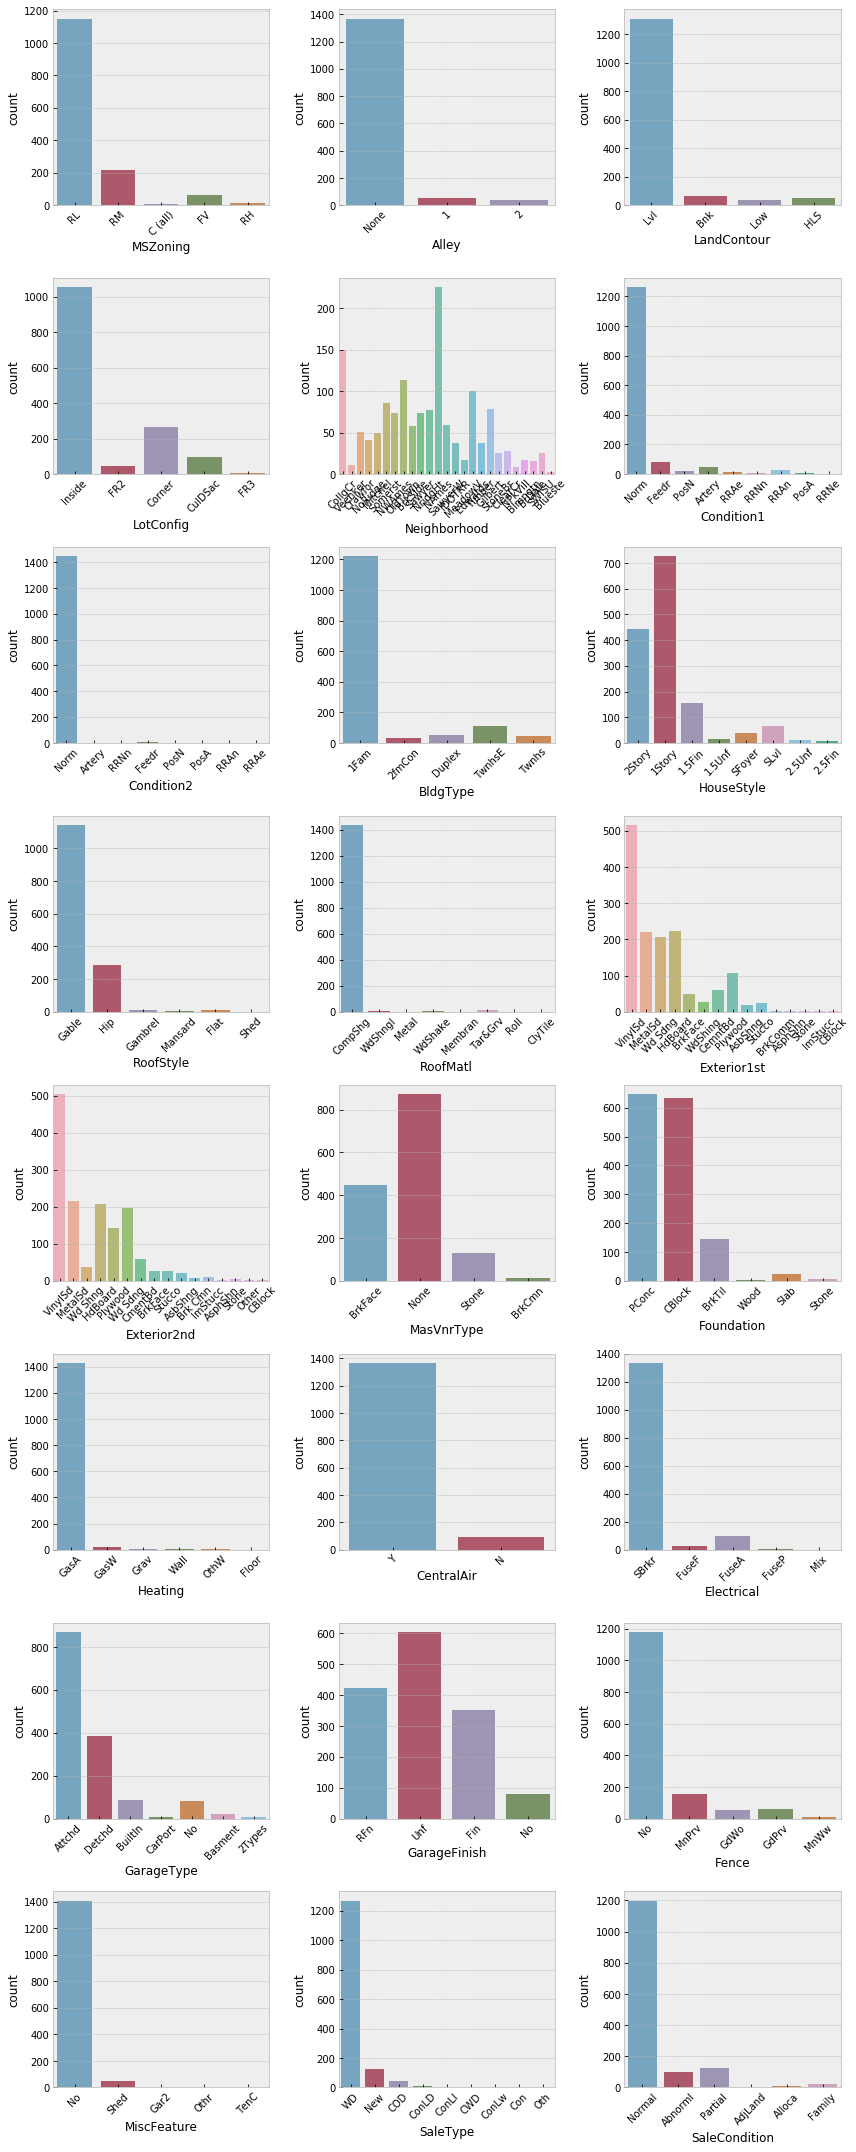

In [7]:
# plots of categorical features

#plt.figure(figsize=(10,6))
#ax = sns.boxplot(x='BsmtExposure', y='SalePrice', data=df_cat)
#plt.setp(ax.artists, alpha=0.5, linewidth=2, edgecolor='k')
#plt.xticks(rotation=45)

#plt.figure(figsize=(12,6))
#ax = sns.boxplot(x='SaleCondition', y='SalePrice', data=df_cat)
#plt.setp(ax.artists, alpha=0.5, linewidth=2, edgecolor='k')
#plt.xticks(rotation=45)

fig, axes = plt.subplots(round(len(df_cat.columns) / 3), 3, figsize=(12,30))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_cat.columns[i], alpha=0.7, data=df_cat, ax=ax)

fig.tight_layout()
# based on the resulting distributions, 
# 1. map the following categorical features: 
# 'MSZoning', 'LotShape', 'LotConfig', 'BldgType', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
# 'BsmtFinType1', 'GarageType', 'SaleType', 'SaleCondition'
# 2. map ordinal variables: 
# 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 
# 'GarageFinish', 'PavedDrive'
# 3. how about mapping location variables? 'Neighborhood', 'Condition1'

In [8]:
# map the following categorical features: 
cat_to_map = ['MSZoning', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 
             'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
             'Heating', 'CentralAir', 'Electrical', 'GarageType', 'Fence', 'MiscFeature', 'SaleType']

ord_to_map = ['Condition1', 'Condition2', 'SaleCondition', 'GarageFinish']
 
df_cat_replace = df_cat.copy()
df_cat_replace = df_cat_replace[cat_to_map + ord_to_map + ['SalePrice']] # 22 categorical variables + SalePrice

# map categorical features
df_cat_replace = pd.get_dummies(df_cat_replace, columns=cat_to_map, prefix=cat_to_map)

# map ordinal variables:              
for i in range(len(ord_to_map)):
    labels = df_cat[ord_to_map[i]].astype('category').cat.categories.tolist()
    replace_map = {ord_to_map[i]: {k: v for k,v in zip(labels, list(range(1, len(labels)+1)))}}
    df_cat_replace.replace(replace_map, inplace=True)
#print(df_cat_replace.columns.tolist())
print(df_cat_replace.shape)

(1460, 154)


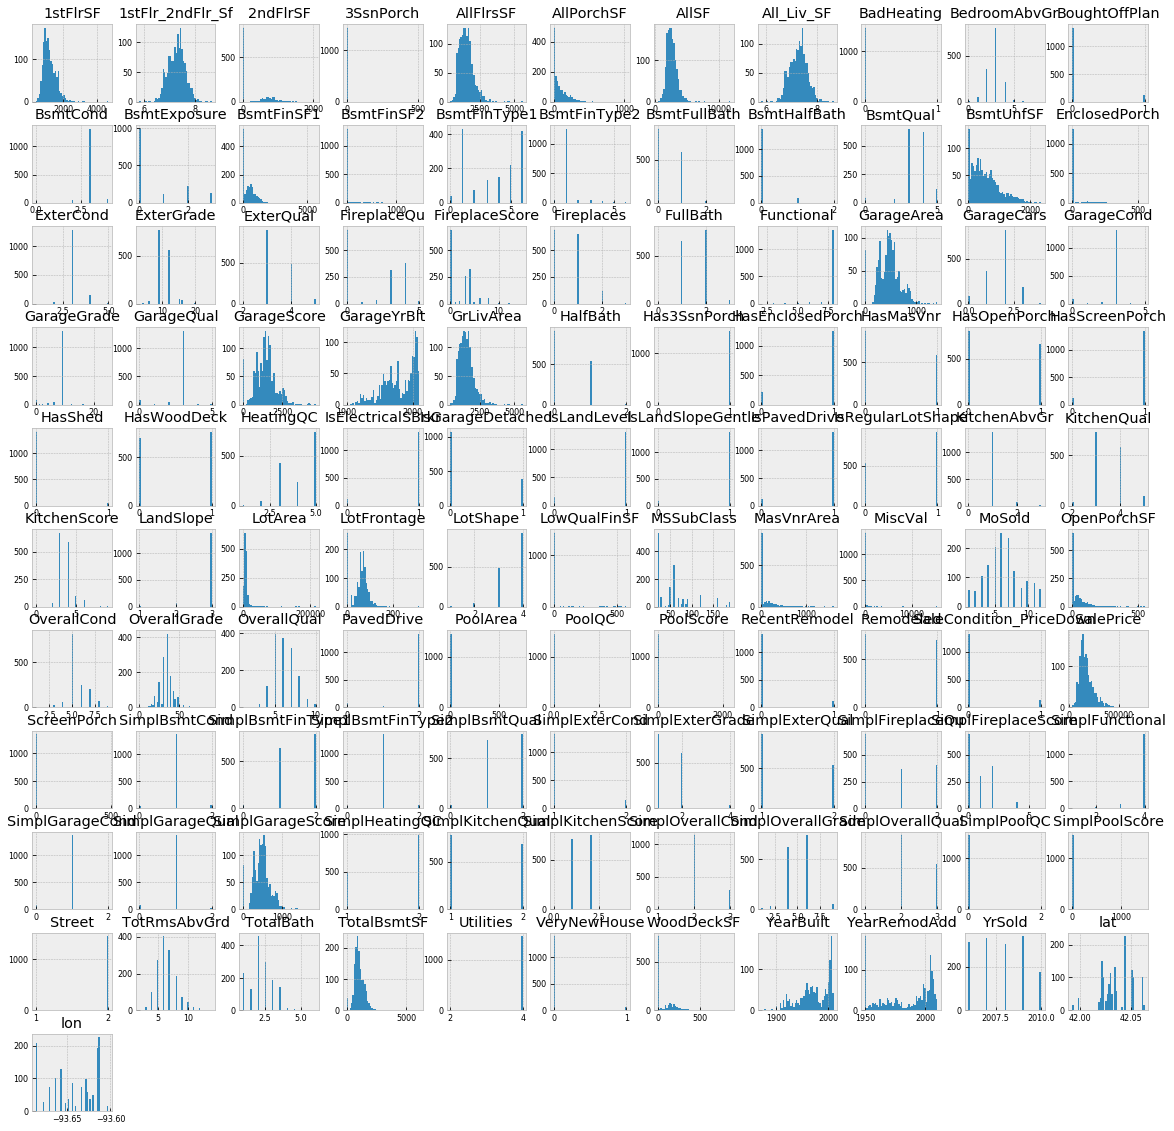

In [9]:
# plot distribution of original numerical features
df_num.hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8);

In [10]:
# plot distribution of original numerical and mapped categorical features
df_cat_mapped = df_cat_replace.copy()
del df_cat_mapped['SalePrice']
df_num_replace = pd.concat([df_cat_mapped, df_num.copy()], axis=1, sort=False)
#print(df_num_replace['SalePrice'][1321]==df['SalePrice'][1321]) #check
print(df_num_replace.shape)

#df_num_replace.hist(figsize=(20,20), bins=50, xlabelsize=6, ylabelsize=6);

(1460, 264)


In [27]:
# find numerical features that are highly correlated to target variable
df_xycorrs = df_num_replace.corr().iloc[:-1,-1]
features_rank = df_xycorrs[abs(df_xycorrs) > 0.45].sort_values(ascending=False)
features_to_keep = features_rank.index.tolist()
pd.DataFrame(features_rank).to_csv('features_rank.csv')
print(features_rank)

OverallQual            0.790982
AllSF                  0.778959
AllFlrsSF              0.716883
GrLivArea              0.708624
1stFlr_2ndFlr_Sf       0.700568
All_Liv_SF             0.686533
ExterQual              0.682639
SimplOverallQual       0.662653
KitchenQual            0.659600
GarageCars             0.640409
TotalBath              0.631731
GarageScore            0.624572
GarageArea             0.623431
SimplExterQual         0.615318
TotalBsmtSF            0.613581
1stFlrSF               0.605852
SimplGarageScore       0.603004
BsmtQual               0.585207
ExterGrade             0.576287
SimplKitchenQual       0.571018
OverallGrade           0.565294
FullBath               0.560664
SimplBsmtQual          0.533800
TotRmsAbvGrd           0.533723
YearBuilt              0.522897
FireplaceQu            0.520438
FireplaceScore         0.510043
YearRemodAdd           0.507101
Foundation_PConc       0.497734
SimplFireplaceQu       0.494496
SimplKitchenScore      0.491367
SimplFir

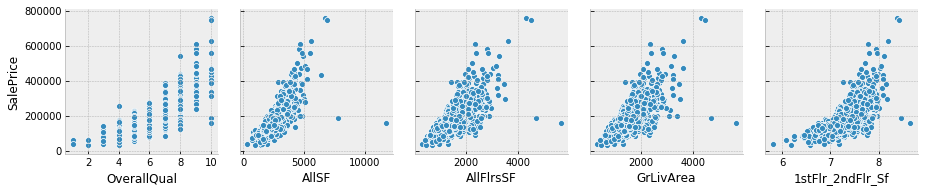

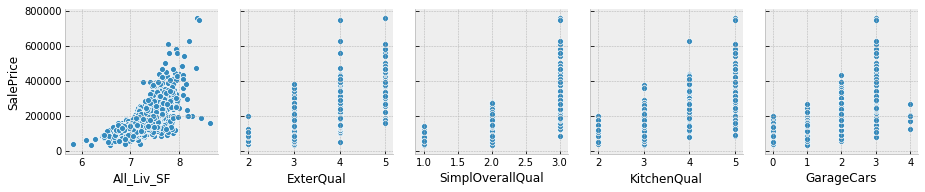

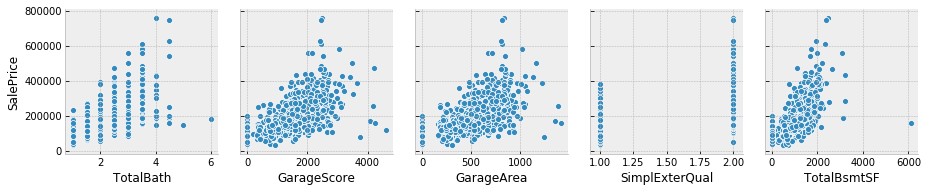

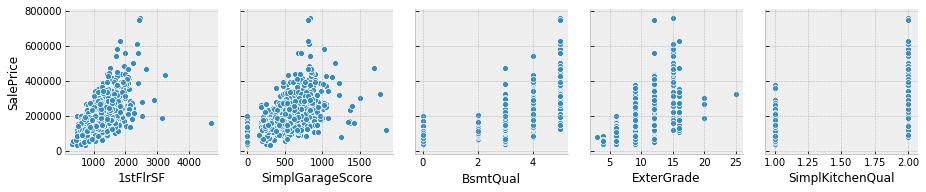

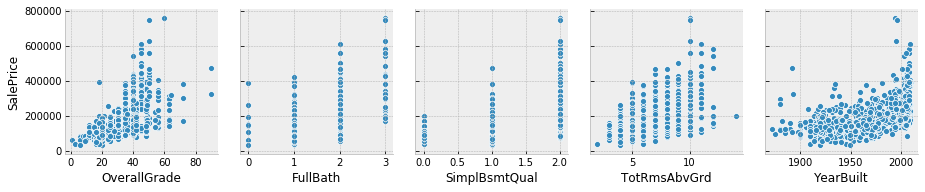

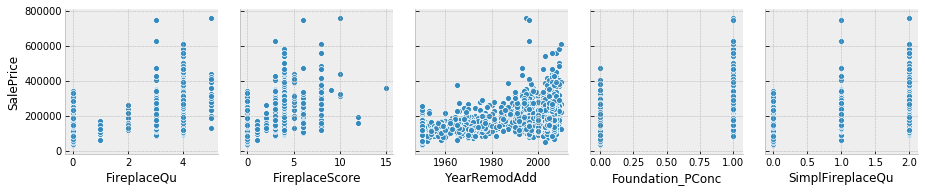

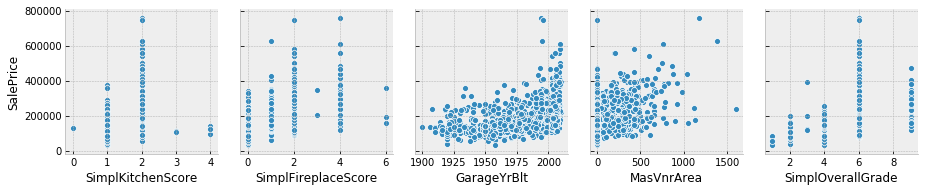

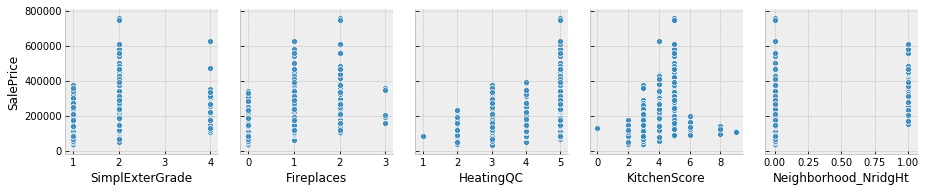

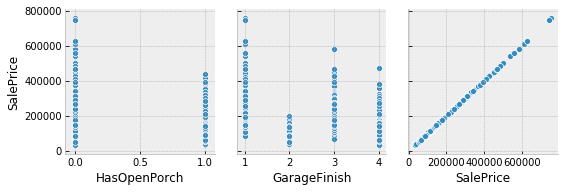

In [14]:
# plot correlations between numerical features and target variable
features_to_keep.append('SalePrice')
for i in range(0, len(features_to_keep), 5):
    sns.pairplot(data=df_num_replace[features_to_keep], 
                 x_vars=df_num_replace[features_to_keep][:-1].columns[i:i+5], 
                 y_vars = ['SalePrice'])

In [ ]:
# improve on correlation outcomes by removing 0 values in original numerical features
#df_num_nozeros=[]
#for col in df_num.columns[:-1]:
#    df_tmp = df_num[[col, 'SalePrice']]
#    df_tmp = df_tmp[df_tmp[col] != 0]
#    df_num_nozeros.append(df_tmp)
    
# transform to dict, and print values in descending order
#from operator import itemgetter

#d = {feature.columns[0]: feature.corr().iloc[0,1] for feature in df_num_nozeros}
#for k,v in sorted(d.items(), key=itemgetter(1)):
#    print (k,v)

In [ ]:
# original numerical features to keep
#features_to_keep = [k for (k,v) in d.items() if abs(v) >= 0.3]
#print(sorted(features_to_keep))

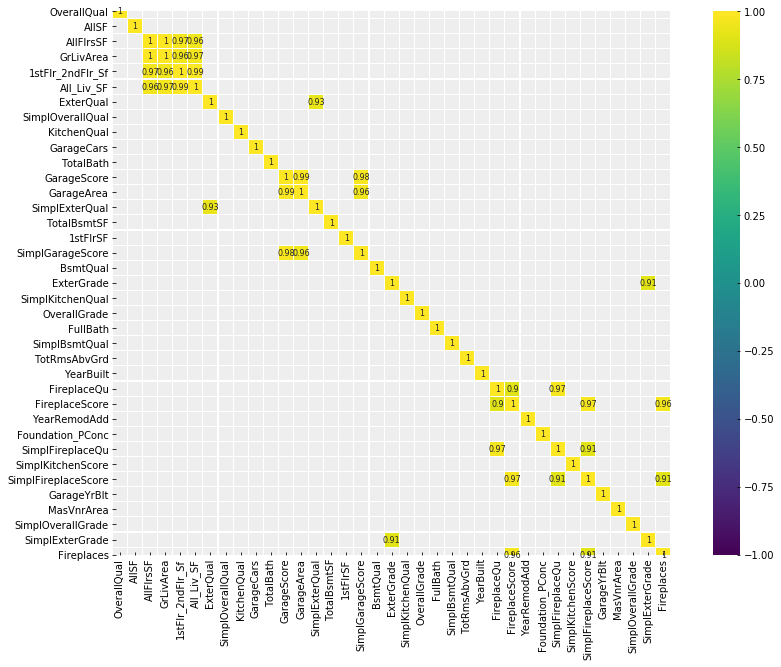

In [31]:
# correlation heatmap of selected features
df_xcorrs = df_num_replace[features_to_keep].corr()
plt.figure(figsize=(15,10))

sns.heatmap(df_xcorrs[(df_xcorrs >= 0.90) | (df_xcorrs <= -0.5)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={'size': 8}, square=True);

In [32]:
#print(*sorted(features_to_keep), sep=', \n')

In [43]:
# features after eda and data manipulation
features_to_keep_old = ['Id','MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd', 
                    '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr',
                    'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                    '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']

features_to_keep_new =['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 
                       'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Foundation_PConc', 
                       'GarageYrBlt','MasVnrArea', 'Fireplaces', 'BsmtFinType1_GLQ', 'BsmtFinSF1', 
                       'SaleType_New','SaleCondition_Partial', 'LotFrontage', 'GarageType_Attchd', 
                       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'Exterior2nd_VinylSd', 'Exterior1st_VinylSd', 
                       'Foundation_CBlock', 'GarageType_Detchd', 'HeatingQC', 'GarageFinish', 'KitchenQual', 
                       'BsmtQual', 'ExterQual']

features_to_keep_shortlist =['1stFlrSF','AllFlrsSF','AllSF','BsmtQual','ExterGrade','ExterQual','FireplaceQu',
                             'Foundation_PConc', 'FullBath','GarageCars','GarageScore','GarageYrBlt','KitchenQual',
                             'MasVnrArea','OverallGrade','OverallQual','TotalBath','TotalBsmtSF','TotRmsAbvGrd',
                             'YearBuilt','YearRemodAdd']

In [47]:
# what to do with the location coordinates?
#print(df_num_replace['lat'].head())

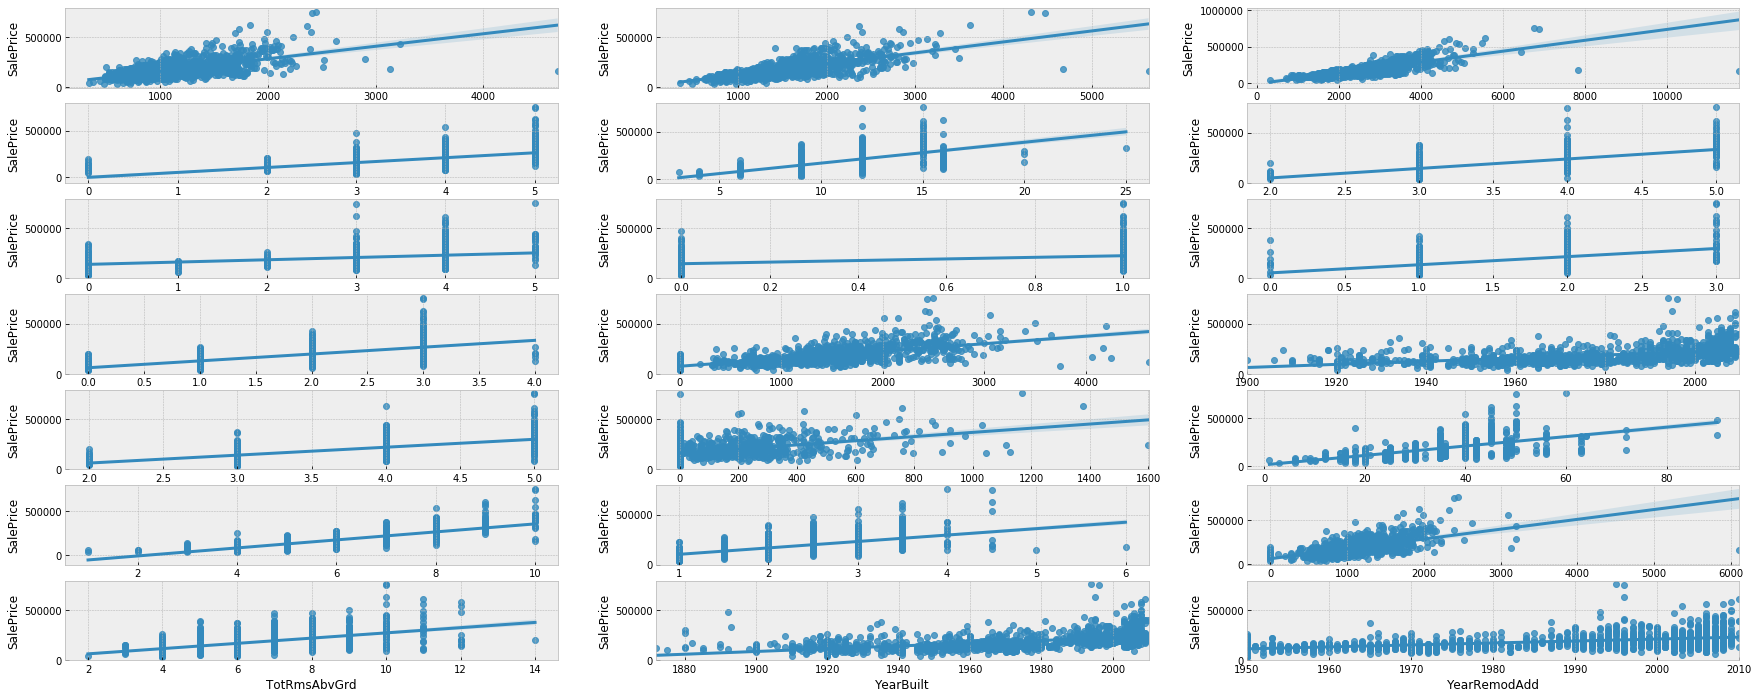

In [44]:
# analyze selected features
shortlist = features_to_keep_shortlist
shortlist.append('SalePrice')
fig, ax = plt.subplots(round(len(shortlist) / 3), 3, figsize=(30,12))

for i, ax in enumerate(fig.axes):
    if i < len(shortlist) - 1:
        sns.regplot(x=shortlist[i], y='SalePrice', data=df_num_replace[shortlist], ax=ax)